# PET preprocessing for the new and improved data pipeline 

In [1]:
import os, time

import numpy as np
import matplotlib.pyplot as plt

import SimpleITK as sitk

In [2]:
from notebook_utils import *

## 1 Smoothing

In [3]:
data_dir = "/home/chinmay/Datasets/HECKTOR/hecktor_train/crFH_rs113_hecktor_nii"
sample_patient_id = "CHGJ007"
pet_sitk = sitk.ReadImage(f"{data_dir}/{sample_patient_id}_pt.nii.gz") # Shape (W,H,D): 450x450x90 voxels

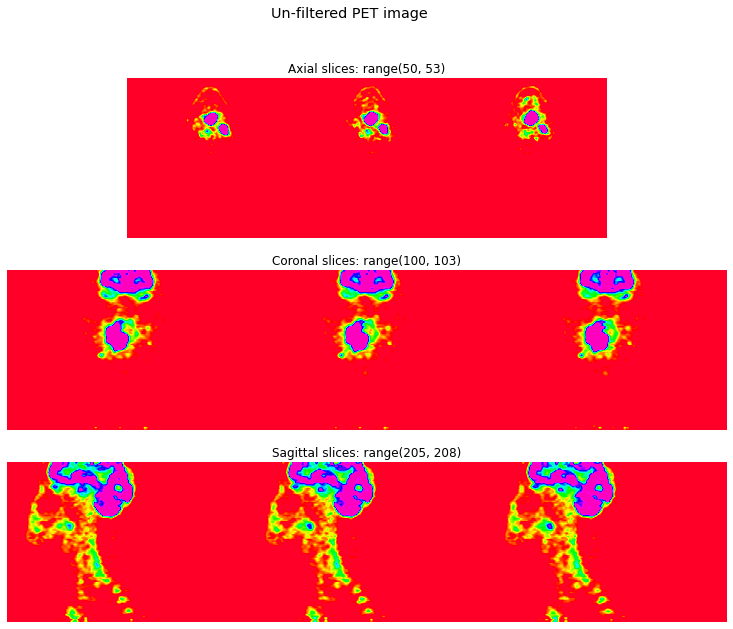

In [4]:
display_image(pet_sitk,
               axial_idxs=range(50,53),
               coronal_idxs=range(100,103),
               sagittal_idxs=range(205,208),
               window={'level':3, 'width':5},
               title="Un-filtered PET image", cmap='gist_rainbow')

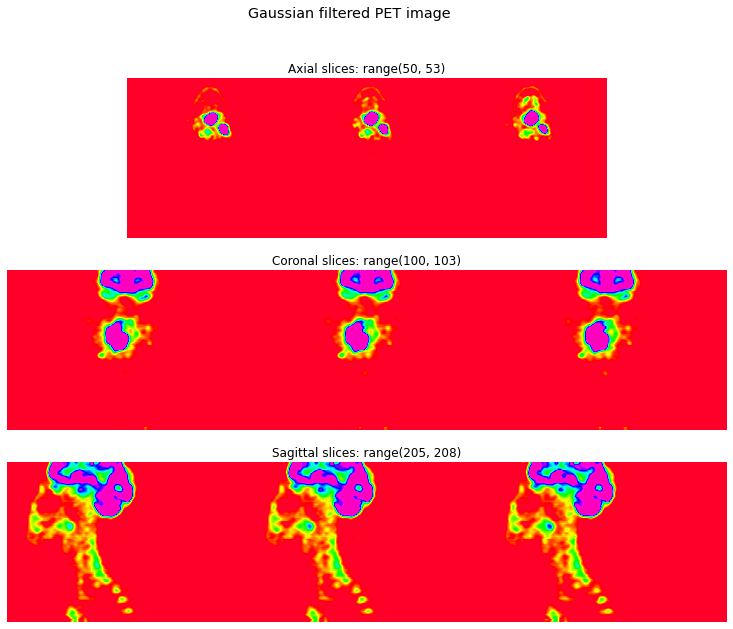

Time taken for filtering: 1.50s


In [5]:
# Discrete Gaussian filter

discrete_gauss_filter = sitk.DiscreteGaussianImageFilter()
discrete_gauss_filter.SetVariance(4.0) # In physical spacing units (mm), if UseImageSpacing is set True. Otherwise, it's in pixels. 
discrete_gauss_filter.SetUseImageSpacing(True)
discrete_gauss_filter.SetMaximumKernelWidth(16) 

t1 = time.time()
pet_gaussian_sitk = discrete_gauss_filter.Execute(pet_sitk)
time_diff = time.time() - t1

display_image(pet_gaussian_sitk,
               axial_idxs=range(50,53),
               coronal_idxs=range(100,103),
               sagittal_idxs=range(205,208),
               window={'level':3, 'width':5},
               title="Gaussian filtered PET image", cmap='gist_rainbow')

print(f"Time taken for filtering: {time_diff:.2f}s")

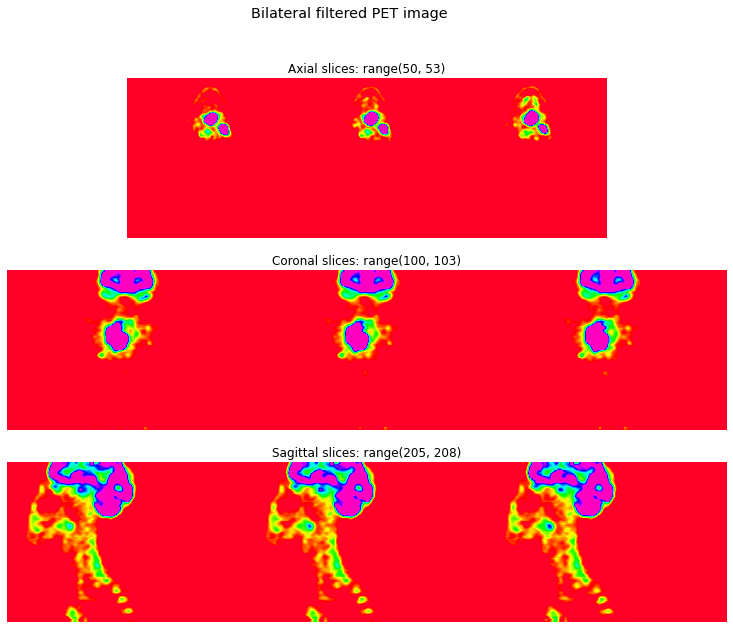

Time taken for filtering: 75.33s


In [6]:
# Bilateral filtering

bilateral_filter = sitk.BilateralImageFilter()
bilateral_filter.SetDomainSigma(2.0) # Domain sigma is specified in the same units as image spacing (mm here)
bilateral_filter.SetRangeSigma(2.5)  # Range sigma is specified in the units of intensity (SUV here)

t1 = time.time()
pet_bilateral_sitk = bilateral_filter.Execute(pet_sitk)
time_diff = time.time() - t1

display_image(pet_gaussian_sitk,
               axial_idxs=range(50,53),
               coronal_idxs=range(100,103),
               sagittal_idxs=range(205,208),
               window={'level':3, 'width':5},
               title="Bilateral filtered PET image", cmap='gist_rainbow')

print(f"Time taken for filtering: {time_diff:.2f}s")

## 2 Intensity normalization 